# Customer Satisfaction Prediction

Customer Satisfaction Prediction involves using machine learning techniques to analyze historical customer data and predict how satisfied a customer is likely to be with a product or service. By examining features such as ticket types, response times, product issues, and customer demographics, the model can identify patterns and trends that influence satisfaction levels. This helps businesses proactively improve customer experiences, reduce churn, and make data-driven decisions to enhance service quality.



#Objectives of the Analysis

The objective of the analysis is to explore and understand the key factors influencing customer satisfaction by examining support ticket data. It aims to identify trends, detect common issues, and evaluate how variables such as ticket type, resolution time, and customer demographics impact satisfaction ratings. This analysis helps build a strong foundation for developing predictive models and supports informed decision-making to enhance customer service operations





#Tools Used

* Python
* Pandas, NumPy
* Seaborn, Matplotlib
* Scikit-learn
* SQL
* Excel

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the dataset
df = pd.read_csv('/content/customer_support_tickets.csv')
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [ ]:
#find null values
df.isnull().sum()


,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [ ]:
#find duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
# Data Preprocessing # Handling missing values
df = df.dropna()


In [ ]:
df.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [ ]:
# Encoding categorical variables
df_model = df.copy()

lable_encoders = {}
# Use df instead of data
for column in df.select_dtypes(include=['object']).columns:
  if column not in ['Customer Satisfaction Rating', 'Customer Email']:
    le = LabelEncoder()
    df_model[column] = le.fit_transform(df_model[column])
    lable_encoders[column] = le

In [ ]:
#columns
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [ ]:
# Define features and target variable
X = df_model.drop(['Customer Satisfaction Rating','Customer Email'], axis=1)
y = df_model['Customer Satisfaction Rating']

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Feature Scaling
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
# Model Building
rfc = LogisticRegression()
rfc.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Predict on the test set
y_pred = rfc.predict(X_test)

In [ ]:
# Model Evaluation
print(accuracy_score(y_test, y_pred))

0.2184115523465704


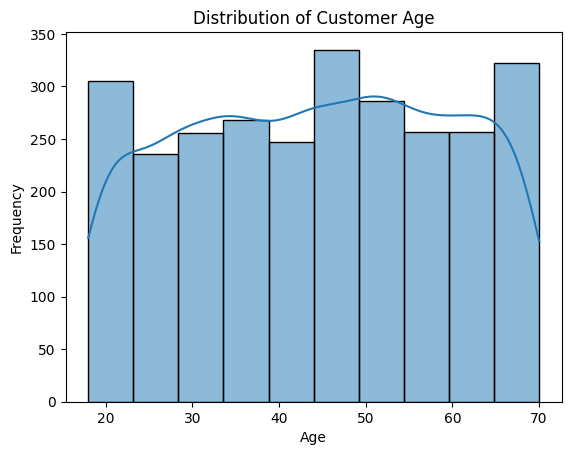

In [ ]:
#Distribution of Customer age
sns.histplot(df['Customer Age'], kde=True, bins=10)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

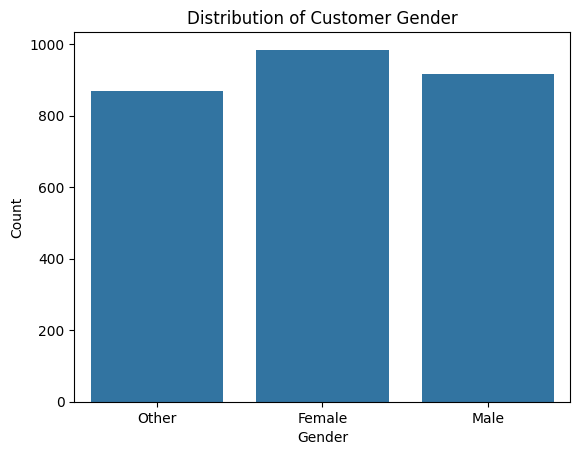

In [ ]:
#Distribution of Customer Gender
sns.countplot(x='Customer Gender',data=df)
plt.title('Distribution of Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

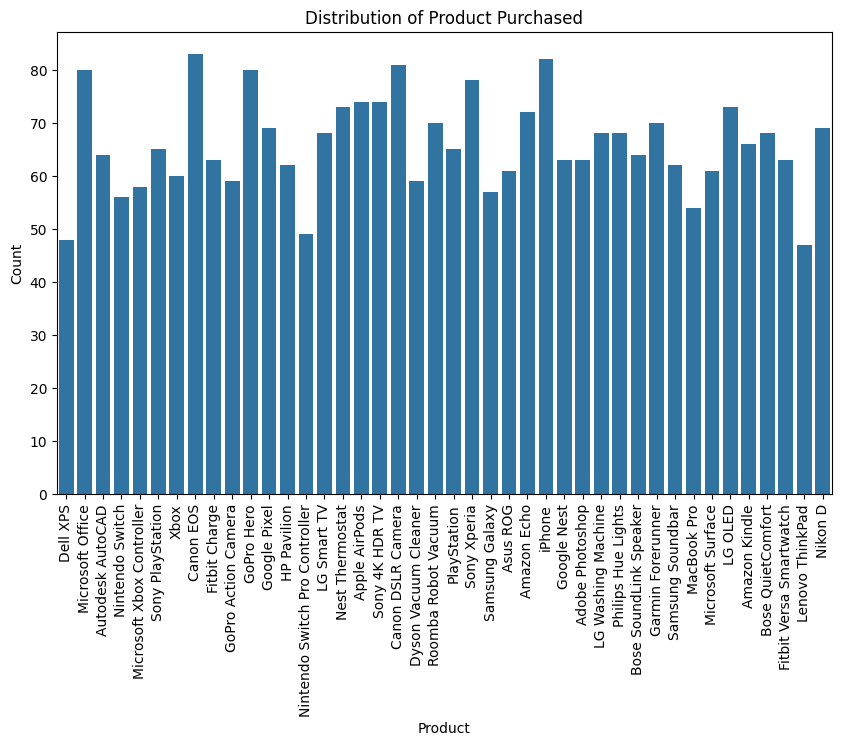

In [ ]:
#Distribution of Product Purchased
plt.figure(figsize=(10, 6))
sns.countplot(x='Product Purchased', data=df )
plt.title('Distribution of Product Purchased')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

/tmp/ipython-input-18-2228398936.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, palette='muted',


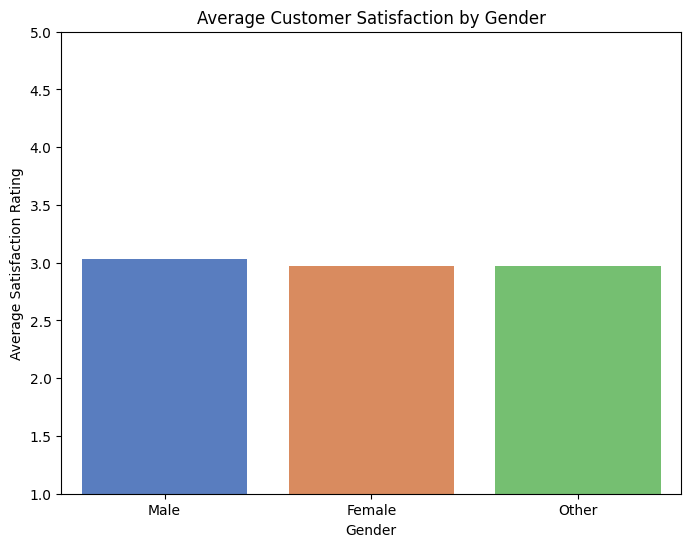

In [ ]:
#Average Customer Satisfaction by Gender
average_satisfaction = df.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, palette='muted',
order=['Male', 'Female', 'Other'])
plt.title('Average Customer Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Rating')
plt.ylim(1, 5)
plt.show()

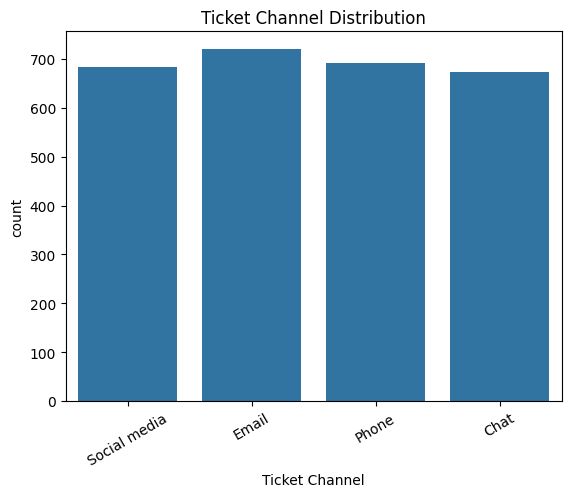

In [ ]:
#Ticket Channel Distribution
sns.countplot(x='Ticket Channel', data=df)
plt.title("Ticket Channel Distribution")
plt.xticks(rotation=30)
plt.show()

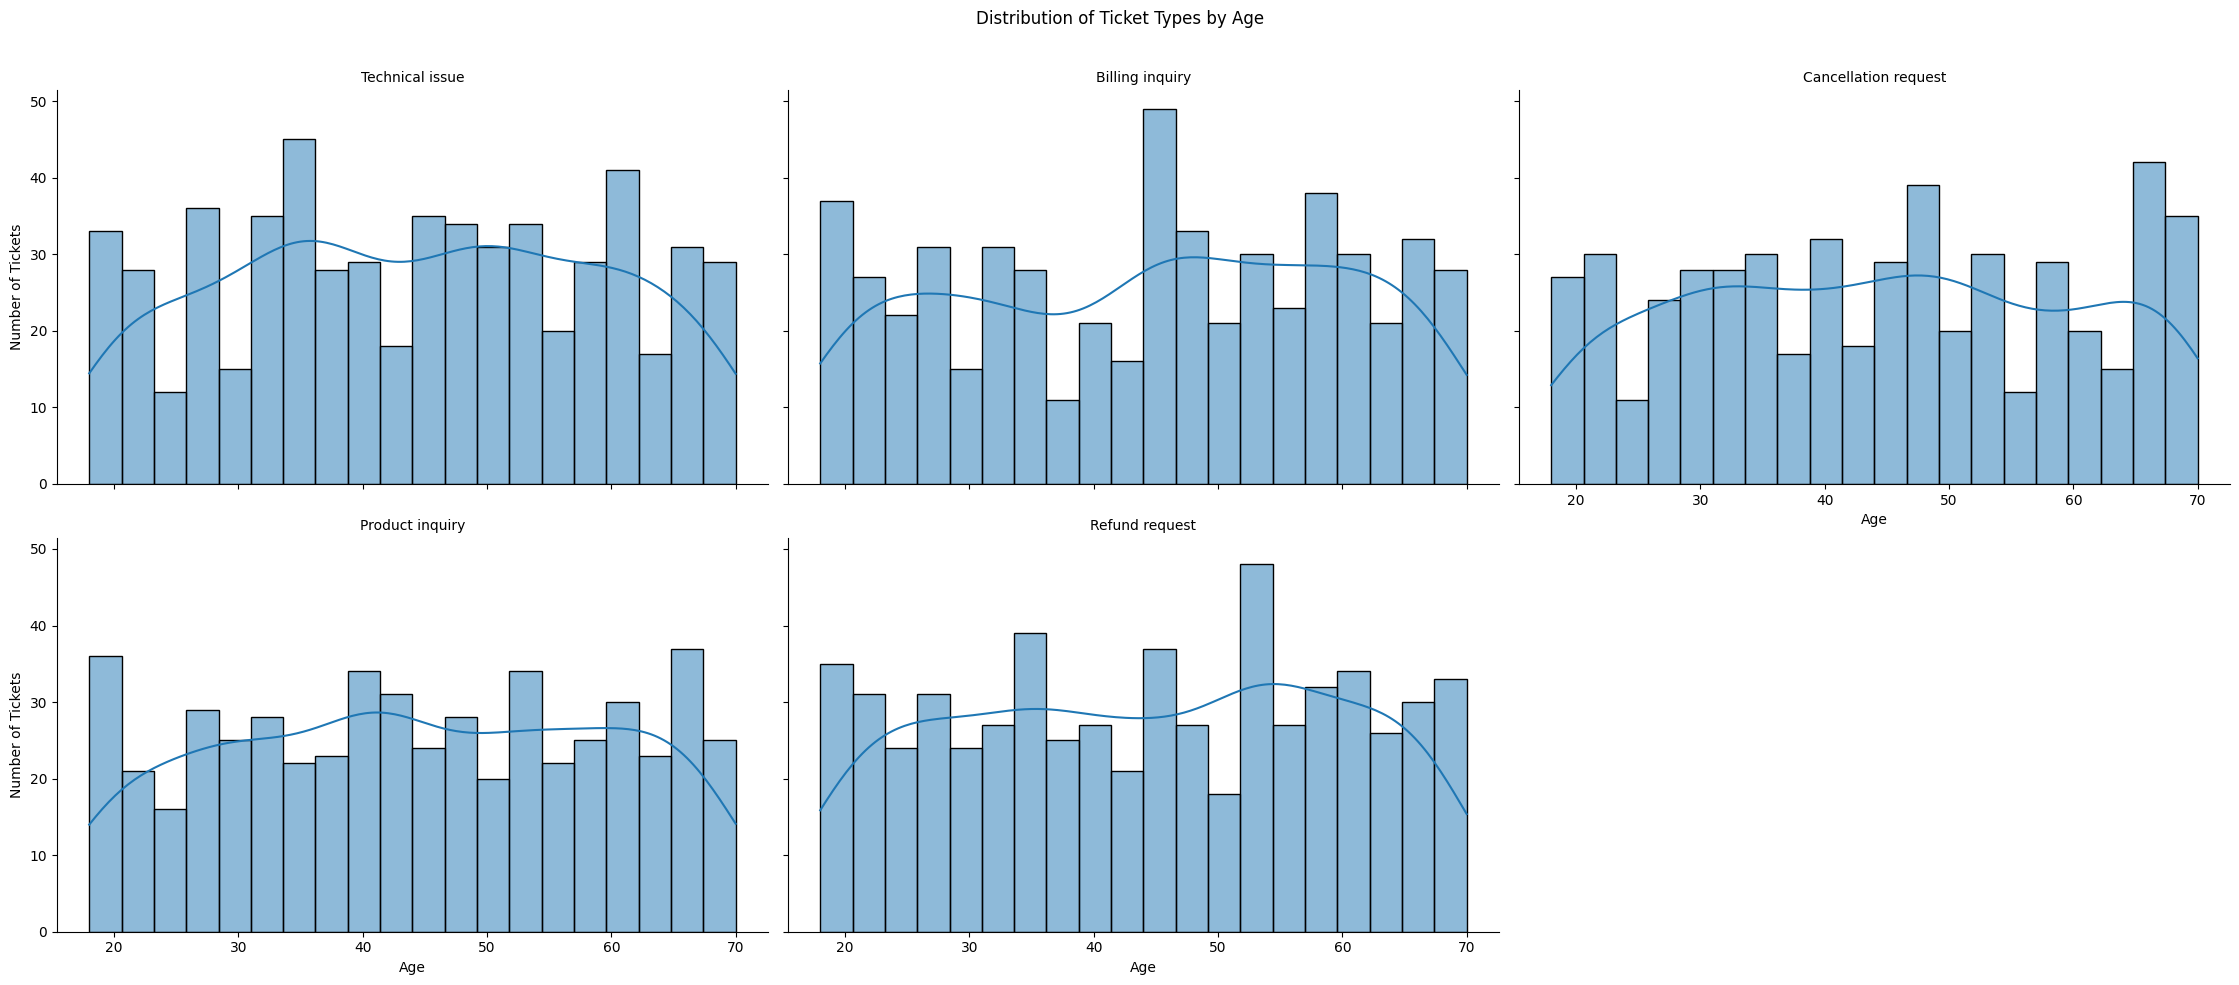

In [ ]:
#Distribution of Ticket Types by Age
df.replace([np.inf, -np.inf], np.nan, inplace=True)
g = sns.FacetGrid(df, col='Ticket Type', col_wrap=3,
height=5, aspect=1.5)
g.map(sns.histplot, 'Customer Age', bins=20, kde=True)
g.set_titles('{col_name}')
g.set_axis_labels('Age', 'Number of Tickets')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Ticket Types by Age')
plt.show()

<Figure size 800x600 with 0 Axes>

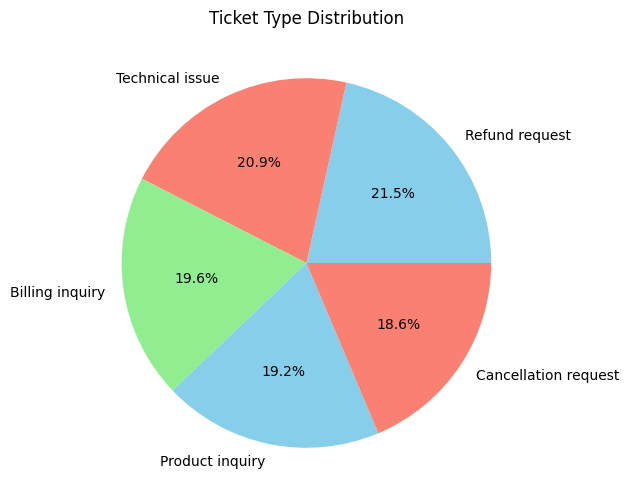

In [ ]:
#Ticket Type Distribution
ticket_type_distribution = df['Ticket Type'].value_counts()
plt.figure(figsize=(8, 6))
ticket_type_distribution = df['Ticket Type'].value_counts()
plt.figure(figsize=(8, 6))
ticket_type_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Ticket Type Distribution')
plt.ylabel('')
plt.show()

/tmp/ipython-input-22-1795302750.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, palette='muted',


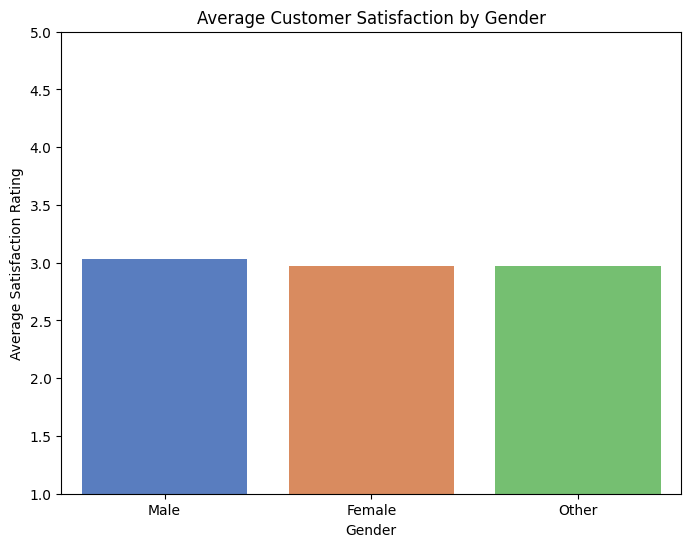

In [ ]:
#Average Customer Satisfaction by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, palette='muted',
order=['Male', 'Female', 'Other'])
plt.title('Average Customer Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Rating')
plt.ylim(1, 5)
plt.show()

/tmp/ipython-input-23-2624625479.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_purchased_distribution.index,


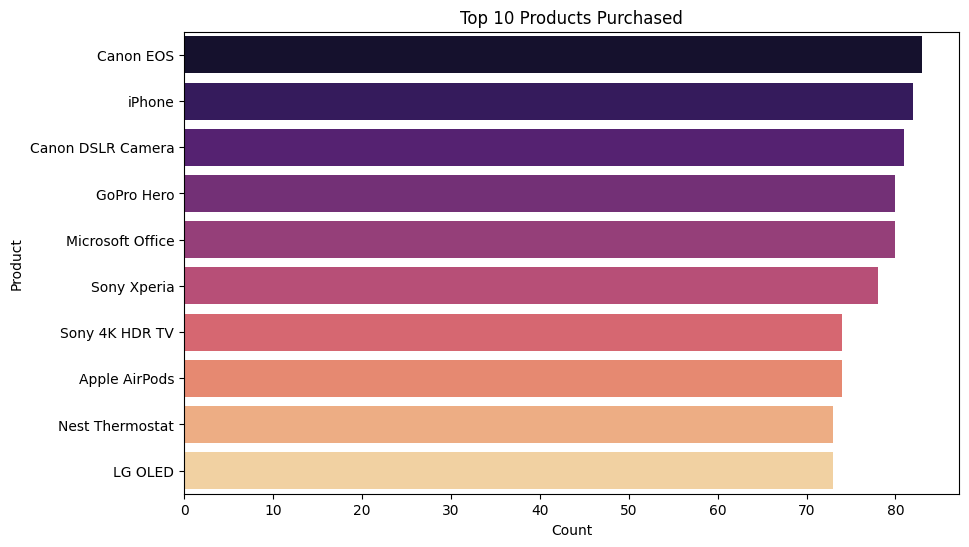

In [ ]:
#top 10 Product Purchased
plt.figure(figsize=(10, 6))
product_purchased_distribution = df['Product Purchased'].value_counts().head(10)
sns.barplot(y=product_purchased_distribution.index,
x=product_purchased_distribution, palette='magma')
plt.title('Top 10 Products Purchased')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()

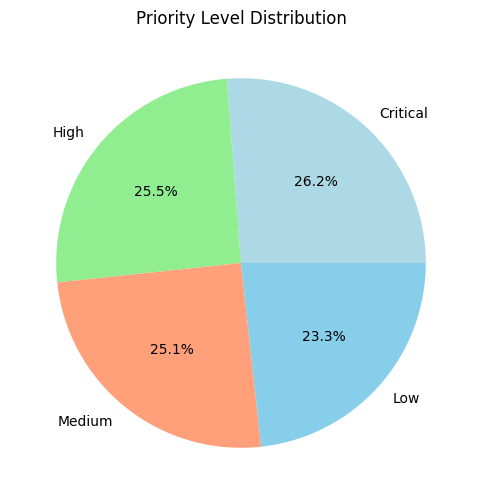

In [ ]:
#Priority Level Distribution
priority_distribution = df['Ticket Priority'].value_counts()
plt.figure(figsize=(8, 6))
priority_distribution.plot(kind='pie', autopct='%1.1f%%',
colors=['lightblue', 'lightgreen', 'lightsalmon', 'skyblue'])
plt.title('Priority Level Distribution')
plt.ylabel('')
plt.show()

/tmp/ipython-input-25-3296188829.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tickets_by_age_group = df.groupby('Age Group').size()


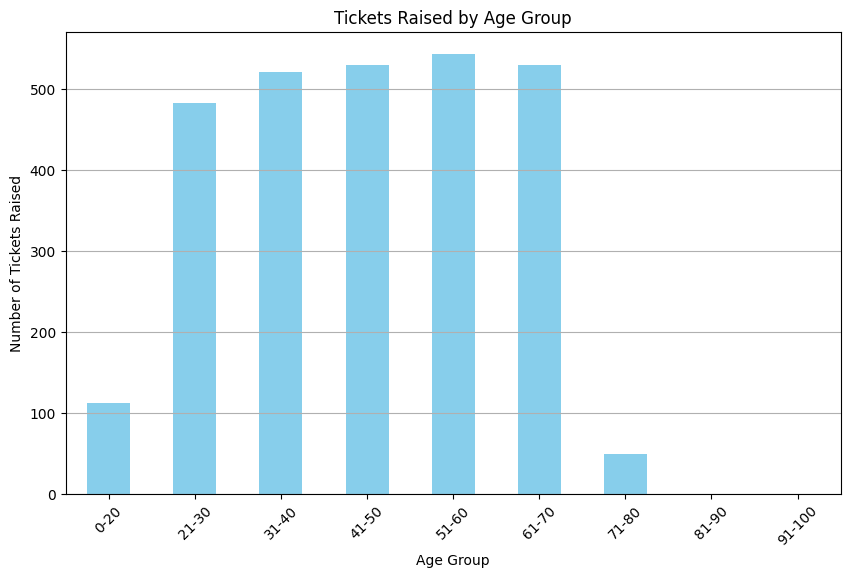

In [ ]:
#Ticket Raised by Age Group
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70',
'71-80', '81-90', '91-100']
df['Age Group'] = pd.cut(df_model['Customer Age'], bins=bins,
labels=labels, right=False)
tickets_by_age_group = df.groupby('Age Group').size()
plt.figure(figsize=(10, 6))
tickets_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Tickets Raised by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Top 10 Common Issues:
Ticket Subject
Network problem           201
Software bug              199
Product compatibility     195
Product recommendation    186
Product setup             183
Hardware issue            183
Delivery problem          178
Refund request            178
Battery life              173
Account access            171
Name: count, dtype: int64


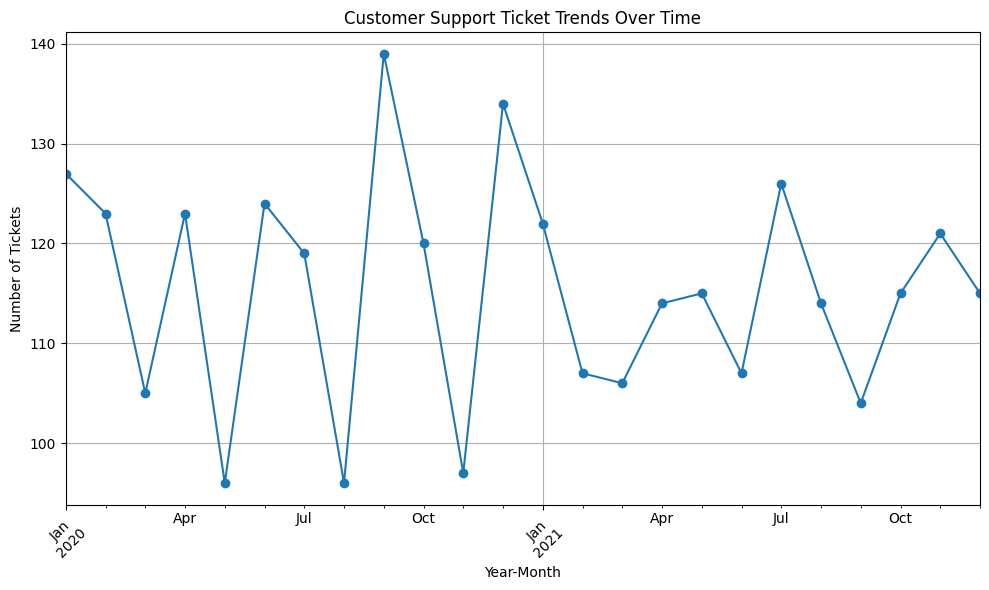

In [ ]:
#Customer Support Ticket Over Time
common_issues = df['Ticket Subject'].value_counts().head(10)
print("Top 10 Common Issues:")
print(common_issues)
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df['YearMonth'] = df['Date of Purchase'].dt.to_period('M')
ticket_trends = df.groupby('YearMonth').size()
plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()